In [1]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
!pip install ultralytics
from ultralytics import YOLO
import glob
import os
import random
import shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.2/611.2 kB 10.3 MB/s eta 0:00:00


In [7]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
random.seed(42)

In [ ]:
!ls


drive  sample_data


In [ ]:
train_dir = "/content/drive/MyDrive/FYP Google Colab/yolo_training_data/train"
val_dir = "/content/drive/MyDrive/FYP Google Colab/yolo_training_data/val"


In [ ]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 192MB/s]


In [ ]:
colab_path = "/content/drive/MyDrive/FYP Google Colab/"

In [ ]:
# Train the model
model.train(data=os.path.join(colab_path,'train_yolo.yaml'), epochs=100, device=0,batch=16,optimizer='Adam',lr0=0.001)

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/FYP Google Colab/train_yolo.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

In [ ]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 5, 8400) (5.9 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 300.9 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 7.0s, saved as runs/detect/train/weights/best.onnx (11.7 MB)

Export complete (7.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'runs/detect/train/weights/best.onnx'

In [ ]:
image = Image.open(os.path.join(colab_path, "test/lesion/standard.jpg"))
results = model(image)


0: 416x640 1 lesion, 101.9ms
Speed: 1.8ms preprocess, 101.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
test_dir = os.path.join(colab_path, "test/")

In [ ]:
results_list, img_list = [],[]
all_test_files = os.listdir(test_dir)
print(all_test_files)
for filename in all_test_files:

  if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".gif"):
    image = Image.open(os.path.join(test_dir,filename))
    results = model(image)
    results_list.append(results)
    img_list.append(os.path.join(test_dir,filename))

['white-ash-tree-bark.jpg', 'standard.jpg', 'AshGuidance-lesion-4yo-ash.jpg.jpg', 'lesion-on-tree.png', 'Chalara-Ash-Dieback_Diamond-shaped-lesions.jpg', 'IMG_5916-scaled-e1665526210581.jpg', 'ADB-info-2.jpg', 'IMG_0987-scaled.jpg', 'Ash-tree-010.webp', 'Ash-Die-Back-or-Hymenoscyphus-Fraxineus1.jpg', 'ash-dieback-lesions.jpg', '_88901834_88901799.jpg', '1200px-Fraxinus_latifolia_JPG1A.jpg', 'fraxinus-pennsylvanica-ba-dcameron.jpg', 'Black ash leaf & spongy bark - Fraxinus nigra.jpg', 'Fraxinus-quadrangulata-5639.jpg', 'frla12.jpg', 'Fraxinus_latifolia_b_1pB7MnSIgKzM.jpg', 'WhiteAshBarkYoung.jpg', 'IMG_6129.jpg', 'ash 2 Credit The Tree Council and partners..jpg', 'ash-dieback_canker3_500w.jpg.jpg', 'Ash-Dieback.gif', '_114032966_img_0685.jpg', 'Mature-lesion-on-stem-584x1024.jpg', 'Black-Ash-Fraxinus-nigra-1.jpg', 'large_main_60b51c80-22c5-40c0-8158-6ab6dd835370.webp', 'Ash Trunk with Lichens.jpg', 'fraxinus-caroliniana-trunk-hp-williams-roadside-everglades-np-wp177-frca-3-30-2017-jpg_o


0: 448x640 (no detections), 101.4ms
Speed: 7.1ms preprocess, 101.4ms inference, 14.1ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 lesion, 101.6ms
Speed: 2.2ms preprocess, 101.6ms inference, 82.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x544 1 lesion, 101.3ms
Speed: 3.0ms preprocess, 101.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 1 lesion, 100.9ms
Speed: 2.4ms preprocess, 100.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 1 lesion, 99.2ms
Speed: 2.5ms preprocess, 99.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 1 lesion, 7.0ms
Speed: 2.7ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 1 lesion, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 1 lesion, 7.1ms
Speed: 2.9ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shap

In [ ]:
print(len(results))

1


In [ ]:
import matplotlib.patches as patches

for i in range(len(results_list)):
  img = Image.open(img_list[i])
  boxes = results_list[i][0].boxes
  fig, ax = plt.subplots(1,figsize=(3,3))
  ax.imshow(img)
  if len(boxes) != 0:
    box = boxes[0]

    box_coords = box.xyxy[0].cpu().numpy()
    xmin = box_coords[0]
    ymin = box_coords[1]
    xmax = box_coords[2]
    ymax = box_coords[3]
    conf = box.conf[0].cpu().numpy()
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(xmin, ymin, f'lesion {conf:.2f}', color='white', bbox={'facecolor': 'red', 'alpha': 0.6, 'pad': 2})
  plt.axis('off')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.


0: 448x640 (no detections), 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 8.1ms
Speed: 2.1ms preprocess, 8.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 lesion, 7.7ms
Speed: 2.5ms preprocess, 7.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 (no detections), 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



['white-ash-tree-bark.jpg', '_88901834_88901799.jpg', '1200px-Fraxinus_latifolia_JPG1A.jpg', 'fraxinus-pennsylvanica-ba-dcameron.jpg', 'Black ash leaf & spongy bark - Fraxinus nigra.jpg', 'frpe100069.jpg', 'Fraxinus-quadrangulata-5639.jpg', 'frla12.jpg', 'Fraxinus_latifolia_b_1pB7MnSIgKzM.jpg', 'WhiteAshBarkYoung.jpg', 'IMG_6129.jpg']


0: 480x640 (no detections), 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 (no detections), 7.8ms
Speed: 2.6ms preprocess, 7.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 (no detections), 6.6ms
Speed: 1.8ms preprocess, 6.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 (no detections), 9.2ms
Speed: 2.6ms preprocess, 9.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 (no detections), 9.0ms
Speed: 3.1ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 (no detections), 7.8ms
Speed: 2.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


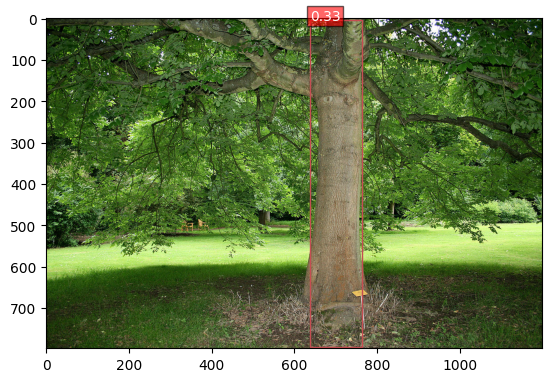

In [ ]:
negative_test_dir =os.path.join(colab_path, "test/no_lesion/")
results_list, img_list = [],[]
all_test_files = os.listdir(negative_test_dir)
print(all_test_files)
for filename in all_test_files:
  image = Image.open(os.path.join(negative_test_dir,filename))
  results = model(image)
  results_list.append(results)
  img_list.append(os.path.join(negative_test_dir,filename))

for i in range(len(results_list)):
  img = Image.open(img_list[i])
  boxes = results_list[i][0].boxes
  if len(boxes) ==0:
    continue
  box = boxes[0]
  fig, ax = plt.subplots(1)
  ax.imshow(img)

  box_coords = box.xyxy[0].cpu().numpy()
  xmin = box_coords[0]
  ymin = box_coords[1]
  xmax = box_coords[2]
  ymax = box_coords[3]
  conf = box.conf[0].cpu().numpy()
  rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
  plt.text(xmin, ymin, f'{conf:.2f}', color='white', bbox={'facecolor': 'red', 'alpha': 0.6, 'pad': 2})

  plt.show()

In [ ]:
model.predict(os.path.join(colab_path, 'ash_video_001.mp4'))

In [ ]:
# Load the YOLOv8 model
model = YOLO(os.path.join(colab_path, "synthetic_and_real/train/weights/best.pt"))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!yolo detect predict model='/content/drive/MyDrive/FYP Google Colab/train/weights/best.pt' source='/content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4' conf=0.4


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 371, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 107, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 156, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 571, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 511, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 791, in load
    with _open_file_like(f,

In [ ]:
from google.colab import files
files.download('runs/detect/predict/ash_video_001.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo detect mode=val model='/content/drive/MyDrive/FYP Google Colab/train/weights/best.pt' source='/content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4' conf=0.4


/bin/bash: yolo: command not found


In [ ]:
!yolo detect val model='/content/drive/MyDrive/FYP Google Colab/train/weights/best.pt' data='/content/drive/MyDrive/FYP Google Colab/val.yaml' device=0

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 16.3MB/s]
val: Scanning /content/drive/MyDrive/FYP Google Colab/test... 29 images, 15 backgrounds, 0 corrupt: 100% 29/29 [00:01<00:00, 18.43it/s]
val: New cache created: /content/drive/MyDrive/FYP Google Colab/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.11s/it]
                   all         29         14      0.894      0.786      0.889      0.531
Speed: 2.2ms preprocess, 16.3ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to runs/detect/val5


In [ ]:
!yolo detect val model='/content/drive/MyDrive/FYP Google Colab/train/weights/best.pt' data='/content/drive/MyDrive/FYP Google Colab/val.yaml' device=0 conf=0.7

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/FYP Google Colab/test.cache... 29 images, 15 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.59it/s]
                   all         29         14      0.917      0.786      0.878      0.574
Speed: 3.1ms preprocess, 19.6ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/val6


In [ ]:
!yolo detect val model='/content/drive/MyDrive/FYP Google Colab/train/weights/best.pt' data='/content/drive/MyDrive/FYP Google Colab/val.yaml' device=0 conf=0.5

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/FYP Google Colab/test.cache... 29 images, 15 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.58it/s]
                   all         29         14      0.894      0.786      0.884      0.553
Speed: 2.2ms preprocess, 22.4ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val7


In [ ]:
import shutil
shutil.copytree('/content/runs/detect/val7', '/content/drive/My Drive/FYP Google Colab/test_results/conf=0.5')


'/content/drive/My Drive/FYP Google Colab/test_results/conf=0.5'

In [8]:
!yolo detect predict model='/content/drive/MyDrive/FYP Google Colab/synthetic_and_real/train/weights/best.pt' source='/content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4'


Ultralytics YOLOv8.0.118 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

video 1/1 (1/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 (no detections), 60.7ms
video 1/1 (2/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 (no detections), 7.6ms
video 1/1 (3/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 1 lesion, 6.2ms
video 1/1 (4/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 1 lesion, 6.1ms
video 1/1 (5/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 (no detections), 6.1ms
video 1/1 (6/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 1 lesion, 6.0ms
video 1/1 (7/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 1 lesion, 6.1ms
video 1/1 (8/4355) /content/drive/MyDrive/FYP Google Colab/ash_video_001.mp4: 384x640 (no detections), 6.0ms

In [8]:
!yolo detect predict model='/content/drive/MyDrive/FYP Google Colab/synthetic_and_real/train/weights/best.pt' source='/content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4'


Streaming output truncated to the last 5000 lines.
video 1/1 (4967/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 6.2ms
video 1/1 (4968/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 8.0ms
video 1/1 (4969/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 6.5ms
video 1/1 (4970/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 6.3ms
video 1/1 (4971/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 7.8ms
video 1/1 (4972/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 7.3ms
video 1/1 (4973/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 6.2ms
video 1/1 (4974/9964) /content/drive/MyDrive/FYP Google Colab/ash_video_002.mp4: 384x640 (no detections), 7.9ms
video 1/1 (4975/9964) /content/drive/MyDrive/FYP Goog

In [9]:
!yolo detect predict model='/content/drive/MyDrive/FYP Google Colab/synthetic_and_real/train/weights/best.pt' source='/content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4'


Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

video 1/1 (1/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 384x640 (no detections), 73.0ms
video 1/1 (2/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 384x640 (no detections), 7.1ms
video 1/1 (3/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 384x640 (no detections), 8.0ms
video 1/1 (4/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 384x640 (no detections), 6.3ms
video 1/1 (5/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 384x640 (no detections), 6.0ms
video 1/1 (6/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 384x640 (no detections), 8.1ms
video 1/1 (7/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 384x640 (no detections), 7.2ms
video 1/1 (8/4432) /content/drive/MyDrive/FYP Google Colab/ash_video_003.mp4: 38

In [11]:
from google.colab import files
files.download('runs/detect/predict/ash_video_002.mp4')
files.download('runs/detect/predict2/ash_video_003.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import shutil
shutil.move('/content/runs/detect/predict', '/content/drive/My Drive/FYP Google Colab/real/runs/predict2')
shutil.move('/content/runs/detect/predict2', '/content/drive/My Drive/FYP Google Colab/real/runs/predict3')

'/content/drive/My Drive/FYP Google Colab/real/runs/predict3'